<div style="font-size: 1.2em; background-color: #85cada; padding: 1em; font-weight: bold; color: ;">
    Object Classification using TensorFlow Lite Model in Flutter
    <br>    
</div>

source: 
* <a href="https://medium.com/@imthiyasv81450/object-detection-using-tensorflow-lite-model-in-flutter-d19b66ddf8d2">medium..</a>
* <a href="https://pub.dev/packages/tflite_flutter">tflite_flutter</a>
* <a href="https://chatgpt.com/">chatgpt my friend</a>

TensorFlow lite converter - converts TF models into a ‘tflite’ format which will be targeted for mobile devices. This will introduce optimization to improve binary size and performance.

The TF lite interpreter will run the converted models on different mobile devices.


#### Different ways of getting ‘tflite’ model file:-
* Download the Trained TensorFlow model from the TensorFlow Hub and it can be converted into a tflite model file using the corresponding converter.
    * <a href="https://www.tensorflow.org/hub">Tensorflow Hub</a>
    * <a href="https://www.tensorflow.org/lite/models/convert/convert_models">conveter</a>
* Tflite model files can be created using a Google Teachable machine, using which we can create custom model files based on our requirements. 
    * (<a href="https://teachablemachine.withgoogle.com/">link</a>)
* There are pre-trained TensorFlow Lite model examples and can be used in sample apps for a variety of ML applications. 
    * (<a href="https://www.tensorflow.org/lite/examples">link</a>)

#### Convert

In [ ]:
from tensorflow.keras.models import load_model

# Load the .keras model
keras_model_path = "../../../02-Model_with_fastapi/notebook/best_model.keras"
model = load_model(keras_model_path)

# Save the model in SavedModel format using export
saved_model_dir = "./saved_model"
model.export(saved_model_dir)

print(f"Model saved in SavedModel format at: {saved_model_dir}")

In [7]:
# Convert the model
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

W0000 00:00:1720457793.506992   71915 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1720457793.507930   71915 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-07-08 17:56:33.510296: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: ./saved_model
2024-07-08 17:56:33.511819: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-07-08 17:56:33.511827: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: ./saved_model
2024-07-08 17:56:33.535249: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-07-08 17:56:33.538144: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-07-08 17:56:33.781314: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: ./saved_model
2024-07-08 17:56:33.809428: I tensorflow/cc/saved_model/loader.cc:317] Sav

In [9]:
model.summary()

Model: "VGG19_CatDog"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            6

 Total params: 21,597,637 (82.39 MB)

 Trainable params: 524,417 (2.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 1,048,836 (4.00 MB)

In [8]:
# Save the model.
with open('cat_dog_model.tflite', 'wb') as f:
  f.write(tflite_model)

#### Setting up the Flutter Project

* Create a New Flutter Project
* Open the pubspec.yaml file, add the necessary dependencies, and Run flutter pub get to fetch the dependencies:
dependencies:
    ```yaml
    camera: ^0.10.5+7
    tflite_flutter: ^0.10.4
    image: ^3.0.1
    image_picker: ^0.8.4+5
    ```

### Integrating TensorFlow Lite Model.
* Add TensorFlow Lite Model: Place your downloaded TensorFlow Lite model in the assets folder of your Flutter project.

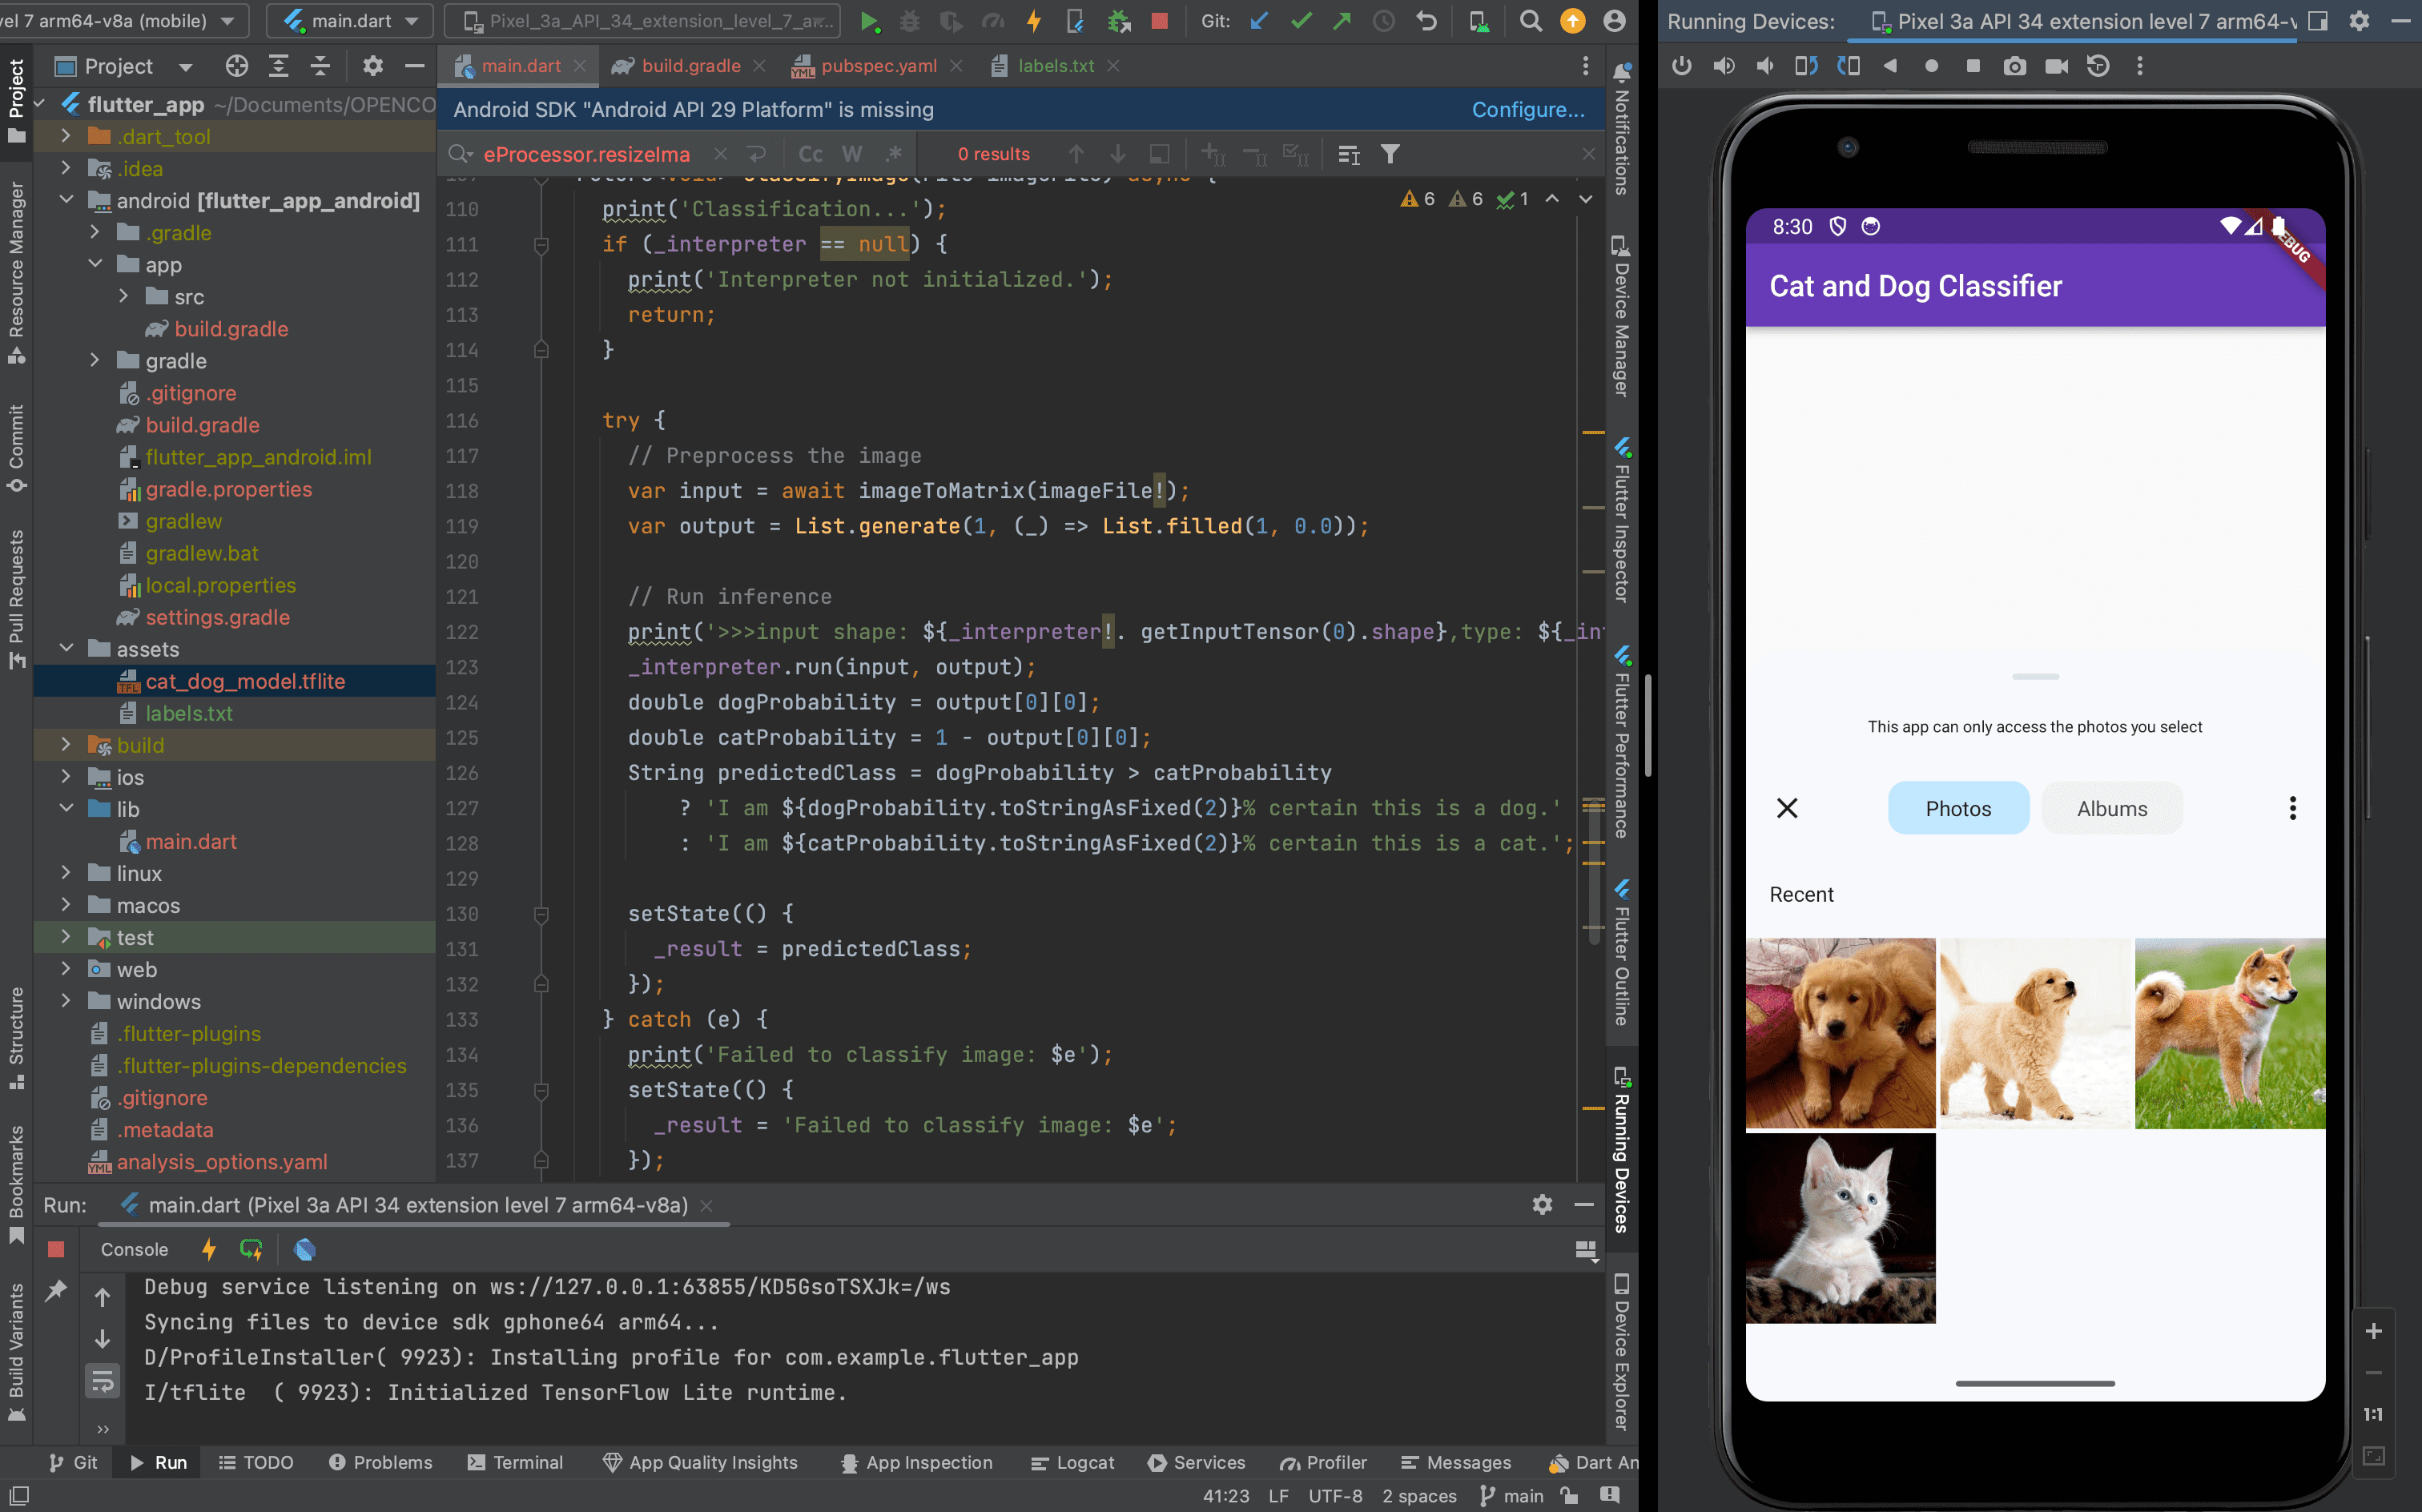

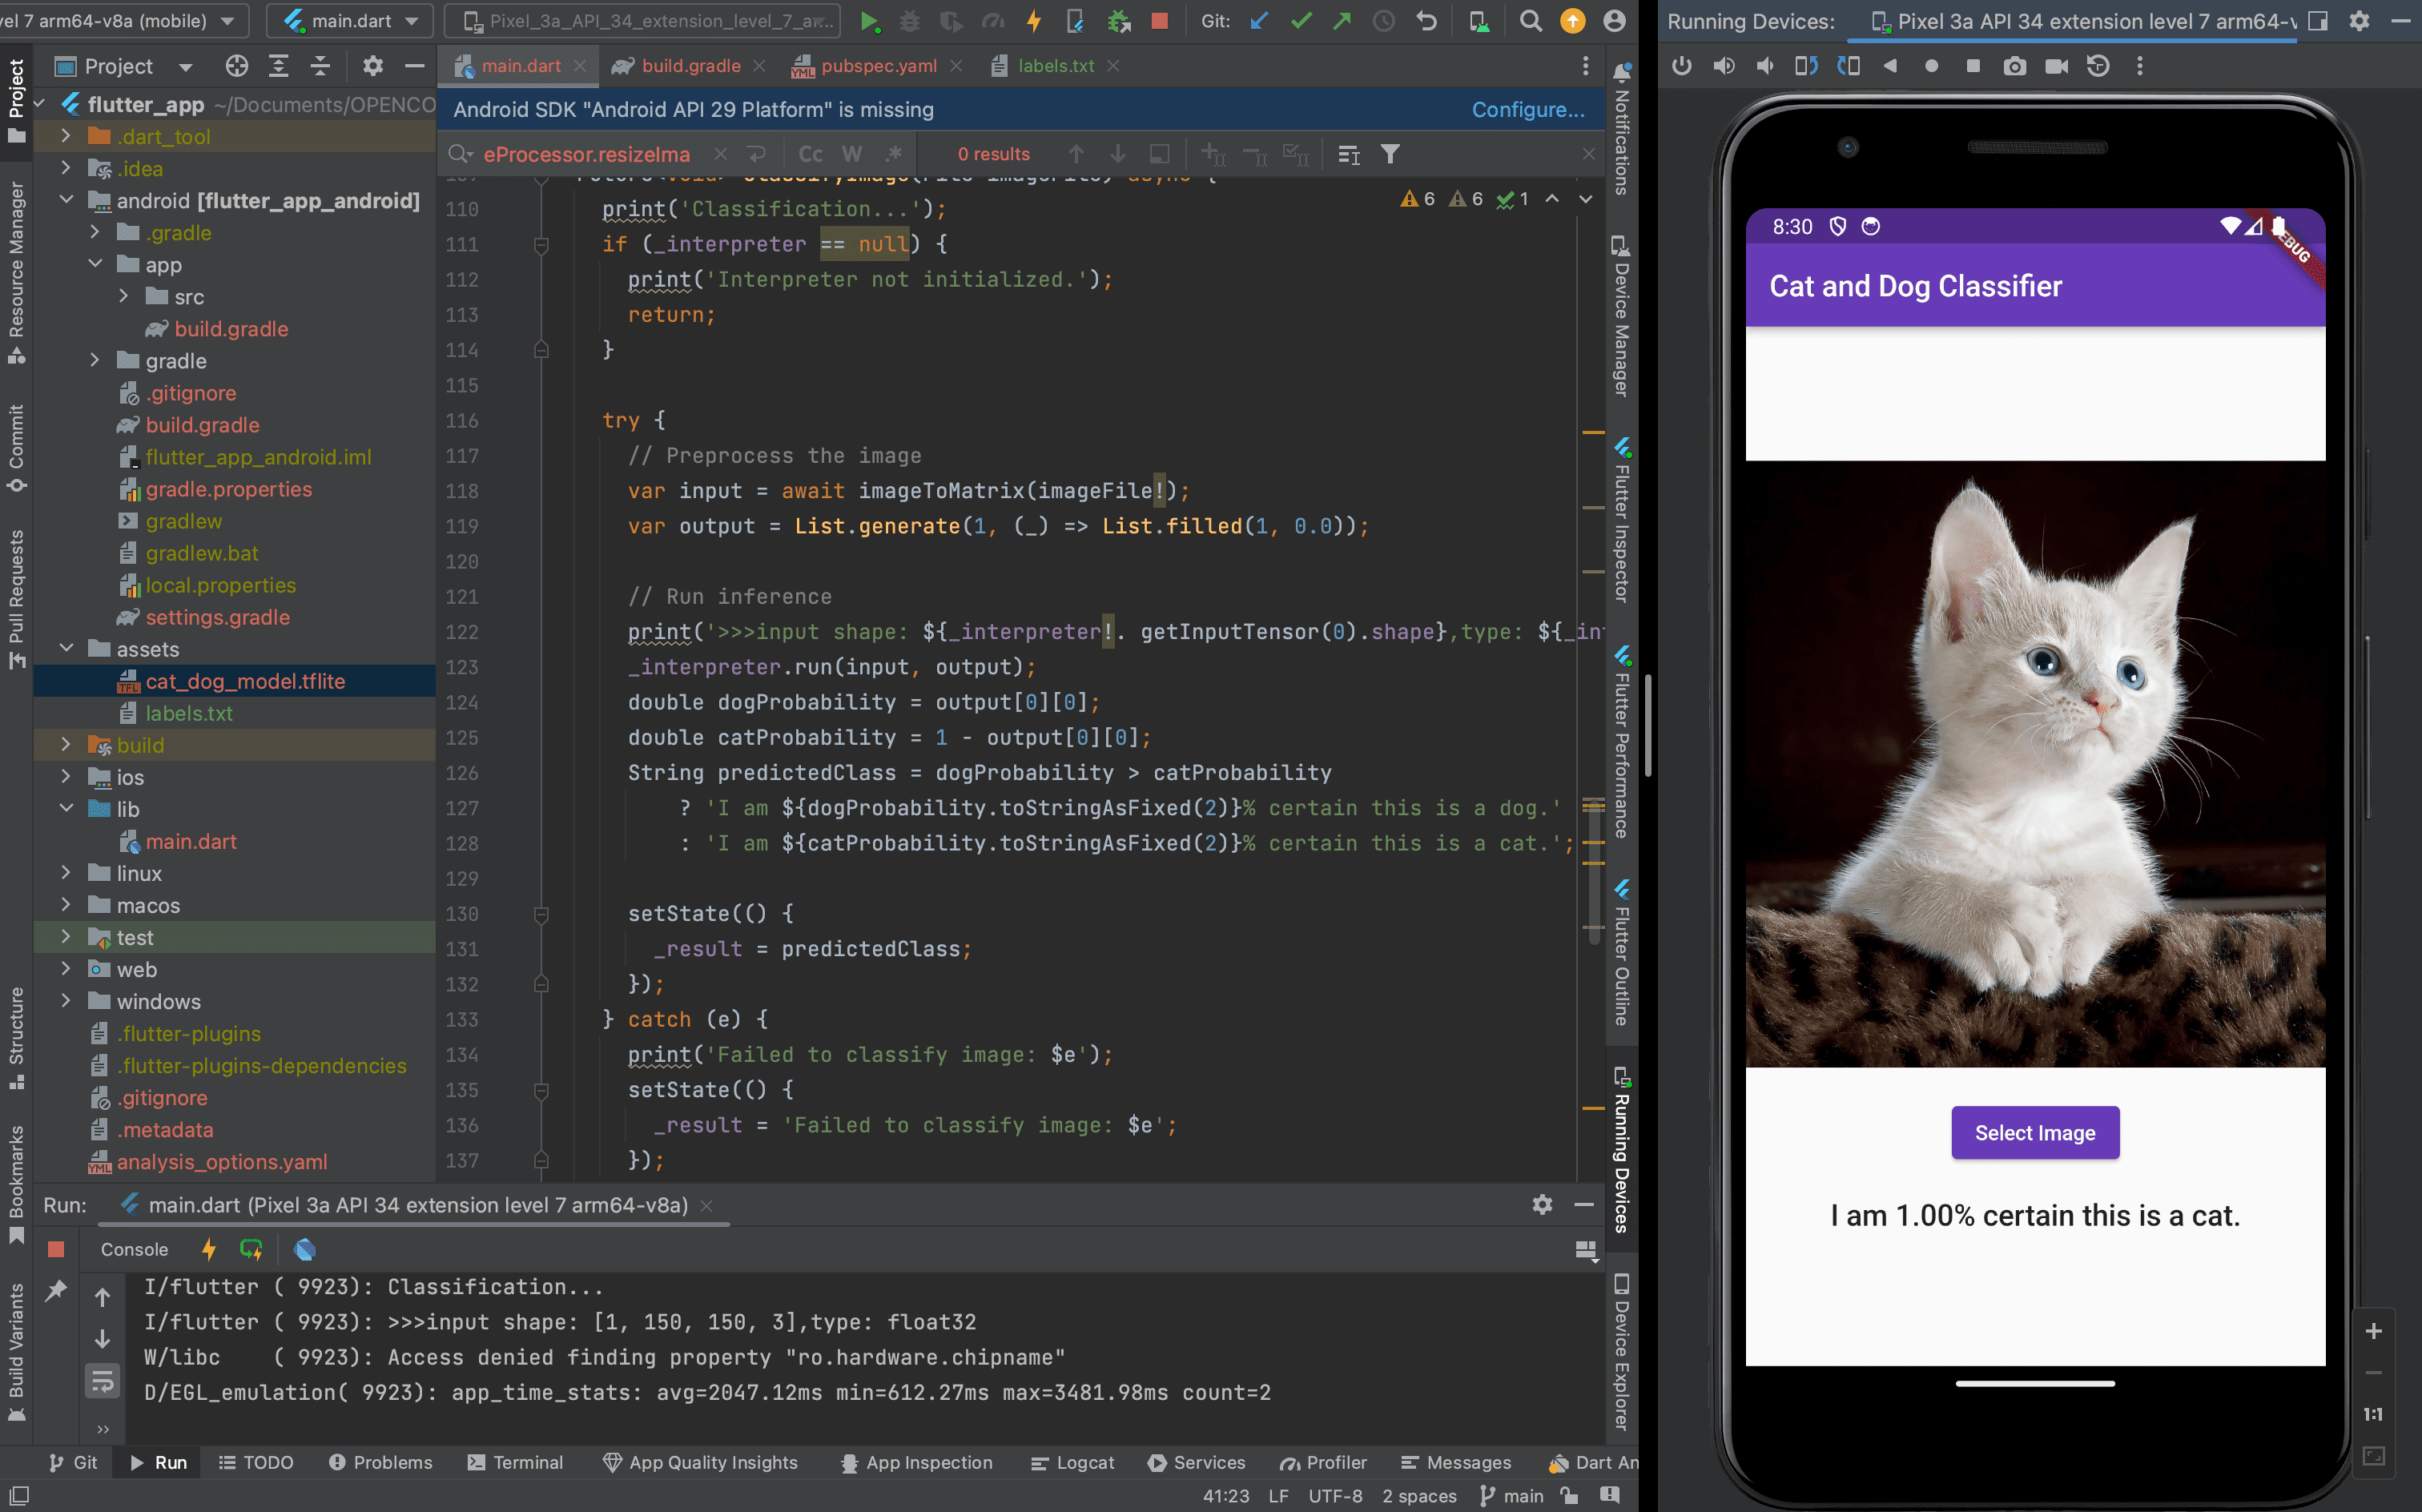

  ```dart
  import 'dart:io';
  import 'dart:typed_data';
  import 'package:flutter/material.dart';
  import 'package:image_picker/image_picker.dart';
  import 'package:tflite_flutter/tflite_flutter.dart' as tfl;
  import 'package:image/image.dart' as imglib;

  void main() {
    runApp(const MyApp());
  }

  class MyApp extends StatelessWidget {
    const MyApp({super.key});

    @override
    Widget build(BuildContext context) {
      return MaterialApp(
        title: 'Cat and Dog Classifier',
        theme: ThemeData(
          colorScheme: ColorScheme.fromSwatch(primarySwatch: Colors.deepPurple),
        ),
        home: const MyHomePage(title: 'Cat and Dog Classifier'),
      );
    }
  }

  class MyHomePage extends StatefulWidget {
    const MyHomePage({super.key, required this.title});

    final String title;

    @override
    State<MyHomePage> createState() => _MyHomePageState();
  }

  class _MyHomePageState extends State<MyHomePage> {
    File? _image;
    final picker = ImagePicker();
    String _result = "Awaiting classification...";
    late tfl.Interpreter _interpreter;
    late int _inputSize;

    @override
    void initState() {
      super.initState();
      loadModel();
    }

    Future<void> loadModel() async {
      try {
        _interpreter = await tfl.Interpreter.fromAsset('assets/cat_dog_model.tflite');
        var inputShape = _interpreter.getInputTensor(0).shape;
        _inputSize = inputShape[1]; // Assuming input shape is [1, height, width, channels]
      } catch (e) {
        print('Failed to load model: $e');
      }
    }

    Future<void> selectImage() async {
      final pickedFile = await picker.pickImage(source: ImageSource.gallery);

      setState(() {
        if (pickedFile != null) {
          _image = File(pickedFile.path);
          classifyImage(_image!);
        } else {
          print('No image selected.');
        }
      });
    }

    Future<List<List<List<List<int>>>>> imageToMatrix(File imageFile) async {
      // Read image bytes
      Uint8List bytes = await imageFile.readAsBytes();

      // Decode image using image package
      imglib.Image? image = imglib.decodeImage(bytes);

      if (image != null) {
        // Resize image to 150x150
        imglib.Image resizedImage = imglib.copyResize(image, width: 150, height: 150);

        // Convert resized image to 4D matrix
        List<List<List<List<int>>>> imageMatrix = [];

        // Create batch dimension (batch_size = 1)
        List<List<List<int>>> batch = [];

        for (int y = 0; y < resizedImage.height; y++) {
          List<List<int>> row = [];
          for (int x = 0; x < resizedImage.width; x++) {
            int pixel = resizedImage.getPixel(x, y);
            int r = imglib.getRed(pixel);
            int g = imglib.getGreen(pixel);
            int b = imglib.getBlue(pixel);
            row.add([r, g, b]);
          }
          batch.add(row);
        }

        imageMatrix.add(batch);

        return imageMatrix;
      } else {
        throw Exception('Failed to decode image.');
      }
    }

    Future<void> classifyImage(File imageFile) async {
      print('Classification...');
      if (_interpreter == null) {
        print('Interpreter not initialized.');
        return;
      }

      try {
        // Preprocess the image
        var input = await imageToMatrix(imageFile!);
        var output = List.generate(1, (_) => List.filled(1, 0.0));

        // Run inference
        print('>>>input shape: ${_interpreter!. getInputTensor(0).shape},type: ${_interpreter!. getInputTensor(0).type}');
        _interpreter.run(input, output);
        double dogProbability = output[0][0];
        double catProbability = 1 - output[0][0];
        String predictedClass = dogProbability > catProbability
            ? 'I am ${dogProbability.toStringAsFixed(2)}% certain this is a dog.'
            : 'I am ${catProbability.toStringAsFixed(2)}% certain this is a cat.';

        setState(() {
          _result = predictedClass;
        });
      } catch (e) {
        print('Failed to classify image: $e');
        setState(() {
          _result = 'Failed to classify image: $e';
        });
      }
    }

    @override
    void dispose() {
      super.dispose();
      _interpreter.close();
    }

    @override
    Widget build(BuildContext context) {
      return Scaffold(
        appBar: AppBar(
          title: Text(widget.title),
        ),
        body: Center(
          child: Column(
            mainAxisAlignment: MainAxisAlignment.center,
            children: <Widget>[
              _image == null
                  ? const Text('No image selected.')
                  : Image.file(_image!),
              const SizedBox(height: 20),
              ElevatedButton(
                onPressed: selectImage,
                child: const Text('Select Image'),
              ),
              const SizedBox(height: 20),
              Text(
                _result,
                style: Theme.of(context).textTheme.headline6,
                textAlign: TextAlign.center,
              ),
            ],
          ),
        ),
      );
    }
  }
  ```